# importing libararies

In [41]:
import pandas as pd  #READ DATASET

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 

from sklearn.preprocessing import StandardScaler #Standarlization
#from sklearn.preprocessing import MinMaxScaler  #NORMALIZATION

from sklearn.model_selection import train_test_split #Spliting Data

from sklearn import metrics

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,accuracy_score #CALC ACCURACY , CONFUSTION MATRIX

import seaborn as sns

from imblearn.over_sampling import RandomOverSampler #Balance Dataset

import matplotlib.pyplot as plt 


# Importing Tkinter module   (GUI)
import tkinter as tk
from tkinter import ttk
from tkinter.messagebox import showinfo


# READ DATASET

In [42]:
data=pd.read_csv('D:\Bankruptcy.csv',na_values = '?')

#  Data Preprocessing  

In [43]:
data.isnull().sum()

id          0
Attr1       1
Attr2       1
Attr3       1
Attr4      22
         ... 
Attr61     16
Attr62     63
Attr63     22
Attr64    212
class       0
Length: 66, dtype: int64

In [44]:
data.fillna(data.mean(),inplace= True)  #fill Nan Values With Mean

In [45]:
data=data.drop('id',axis=1) 


In [46]:
data.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64

In [47]:
print( "Duplicated Record : " , data.duplicated().sum())

Duplicated Record :  90


In [48]:
data.drop_duplicates(inplace= True)
print( "Duplicated Record : " , data.duplicated().sum())

Duplicated Record :  0


# Features And Target

In [49]:
X = data.drop('class', axis=1)  # Features       
y = data['class']  # Target

# Feature Selection

In [50]:
#FeatureSelection = SelectPercentile(score_func = chi2, percentile=20) # score_func can = f_classif
#X = FeatureSelection.fit_transform(X, y)


# Feature Scaling (Normalization)

In [51]:
scalar = StandardScaler()
X = scalar.fit_transform(X)


# Correlation


In [52]:
corrMatrix = data.corr()

print (corrMatrix)

           Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
Attr1   1.000000 -0.429296  0.428742  0.002676  0.230961  0.332241  0.174815   
Attr2  -0.429296  1.000000 -0.998611 -0.005193 -0.426307 -0.981252 -0.073451   
Attr3   0.428742 -0.998611  1.000000  0.006072  0.427438  0.979955  0.073582   
Attr4   0.002676 -0.005193  0.006072  1.000000  0.024897  0.001469  0.000067   
Attr5   0.230961 -0.426307  0.427438  0.024897  1.000000  0.406000  0.039509   
...          ...       ...       ...       ...       ...       ...       ...   
Attr61  0.001978  0.000842 -0.001703 -0.000696 -0.001295 -0.002622  0.405999   
Attr62 -0.001048  0.195354 -0.195640 -0.000889 -0.059679 -0.204575 -0.000428   
Attr63  0.007759 -0.002192  0.002437  0.015294  0.000958  0.000459  0.980829   
Attr64 -0.023131 -0.000236  0.000385 -0.000208  0.000409  0.044532  0.452234   
class  -0.011884  0.038224 -0.038413 -0.001863 -0.007565 -0.040610 -0.004161   

           Attr8     Attr9    Attr10  .

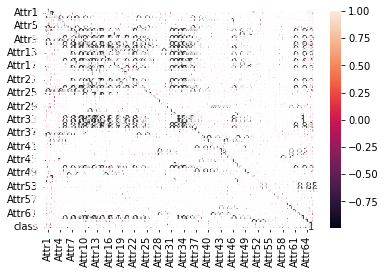

In [53]:
sns.heatmap(corrMatrix, annot=True)

plt.show()

# Check Balance Dataset

BEFORE BALANCING : 
0    9685
1     398
Name: class, dtype: int64


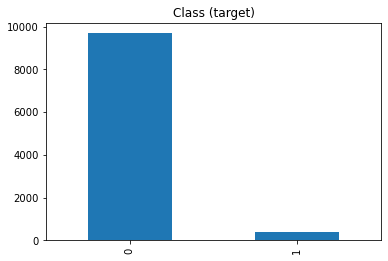

In [54]:
print("BEFORE BALANCING : ")
print(y.value_counts())
_ = y.value_counts().plot(kind='bar', title='Class (target)')

In [55]:
def plot_con_matrix(cf_matrix):
    fx =sns.heatmap(cf_matrix, annot=True, cmap='turbo')
    fx.set_title(' Confusion Matrix ');
    fx.set_xlabel('Predicted Values')
    fx.set_ylabel('Actual Values ');
    fx.xaxis.set_ticklabels(['False','True'])
    fx.yaxis.set_ticklabels(['False','True'])
    plt.show()


# splitting data into training and testing

In [56]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.25) # 75% training and 25% test

# Making Dataset Balanced


AFTER BALANCING : 
0    7268
1    7268
Name: class, dtype: int64


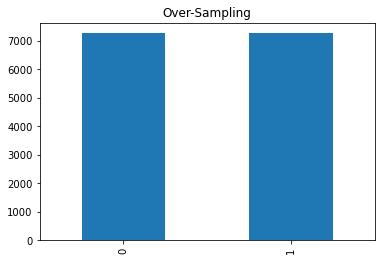

In [57]:
print("AFTER BALANCING : ")
ros=RandomOverSampler(sampling_strategy=1)
X_train, y_train = ros.fit_resample(X_train, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)
print(y_train.value_counts())
ax =y_train.value_counts().plot(kind='bar', title='Over-Sampling')


# logistic Regression

[[1494  923]
 [ 573 1844]]


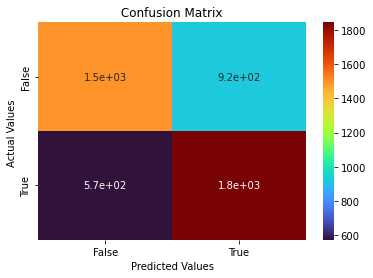

Confusion Matrix : 
 [[1494  923]
 [ 573 1844]]

 Accuracy :  0.6905254447662391


In [58]:
Logclassifier=LogisticRegression(max_iter=3500)
Logclassifier.fit(X_train, y_train)
LogY_pred = Logclassifier.predict(X_test)
Logcm = confusion_matrix(y_test, LogY_pred)
cf_matrix = confusion_matrix(y_test, LogY_pred)
print(cf_matrix)
plot_con_matrix(cf_matrix)
print ("Confusion Matrix : \n", Logcm)
LRacc= accuracy_score(y_test, LogY_pred)
print ("\n Accuracy : ", LRacc)


# Support Vector Machine

[[1158 1259]
 [ 456 1961]]


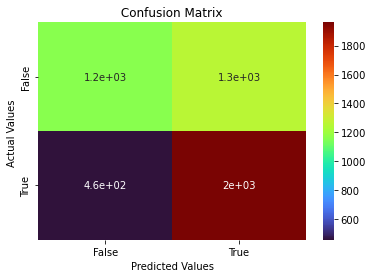

Confusion Matrix : 
 [[1158 1259]
 [ 456 1961]]

 Accuracy: 0.6452213487794787


In [59]:
svmClassifer = svm.SVC(kernel='linear')
svmClassifer.fit(X_train, y_train)
svmY_pred = svmClassifer.predict(X_test)
SVMcm = confusion_matrix(y_test, svmY_pred)
cf_matrix = confusion_matrix(y_test, svmY_pred)
print(cf_matrix)
plot_con_matrix(cf_matrix)
print ("Confusion Matrix : \n", SVMcm)
SVMacc=metrics.accuracy_score(y_test, svmY_pred)
print("\n Accuracy:",SVMacc)

# Decision Tree

Confusion Matrix : 
 [[2357   60]
 [1320 1097]]
[[2357   60]
 [1320 1097]]


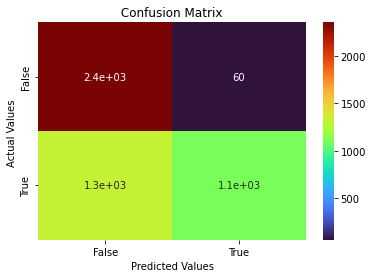


 Accuracy: 0.7145221348779479


In [60]:
Dtreeclassifier = DecisionTreeClassifier()
Dtreeclassifier.fit(X_train, y_train)
DtreeY_pred = Dtreeclassifier.predict(X_test)
Dtreecm = confusion_matrix(y_test, DtreeY_pred)
print ("Confusion Matrix : \n", Dtreecm)
cf_matrix = confusion_matrix(y_test, DtreeY_pred)
print(cf_matrix)
plot_con_matrix(cf_matrix)
DTacc= metrics.accuracy_score(y_test, DtreeY_pred)
print("\n Accuracy:",DTacc)



In [61]:
# root window
root = tk.Tk()
root.geometry('300x220')
root.resizable(False, False)
root.title('Bankruptcy Prediction ')

accuracy = tk.StringVar()

def show_accuracy():
    showinfo(
        title='Accuracy ',
        message=accuracy.get()
    )


Methods = (('Logistic Regression', LRacc),
         ('SVM', SVMacc),
         ('Decision Tree', DTacc)
         )

# label
label = ttk.Label(text="What's Classification Method ?")
label.pack(fill='x', padx=5, pady=5)

# radio buttons
for i in Methods:
    r = ttk.Radiobutton(
        root,
        text=i[0],
        value=i[1],
        variable=accuracy )
    r.pack(fill='x', padx=10, pady=15 )

# button
button = ttk.Button(
    root,
    text=" Show Accuarcy ",
    command=show_accuracy)

button.pack(fill='x', padx=10, pady=5)

root.mainloop()